In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [2]:
# fetching the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


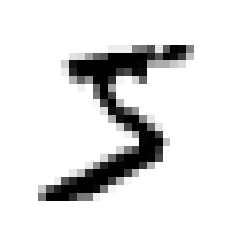

In [5]:
# plot the first image
plt.imshow(X_train[0], cmap='binary', interpolation='nearest')
plt.axis('off')
plt.show()

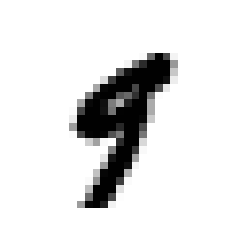

In [6]:
plt.imshow(X_train[36000], cmap='binary', interpolation='nearest')
plt.axis('off')
plt.show()


In [7]:
# shuffling the dataset
shuffle_index = np.random.permutation(60000)
x_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [8]:
# creating a 5-detector 
y_train_5 = (y_train == 5)
y_test_5 =  (y_test ==5)

In [9]:
# flattening the dataset from a 3-D to a 2-D 
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=66)
sgd_clf.fit(X_train_2d, y_train_5)


SGDClassifier(random_state=66)

Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This clas‐ sifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning)

In [11]:
some_digit = X_train_2d[36000]
sgd_clf.predict([some_digit])

array([False])

In [12]:
some_5_digit = X_train_2d[89]
sgd_clf.predict([some_5_digit])

array([False])

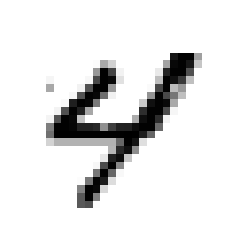

In [13]:
# plotting the image
plt.imshow(X_train_2d[89].reshape(28,28), cmap='binary', interpolation='nearest')
plt.axis('off')
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train_2d, y_train_5, cv=3, scoring='accuracy')

array([0.67575, 0.52935, 0.9049 ])

In [15]:
# confusion matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_2d, y_train_5, cv=3)

Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the <b style="color:blue;font-size:26px;"> predictions</b> made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).

[[40830 13749]
 [ 4051  1370]]


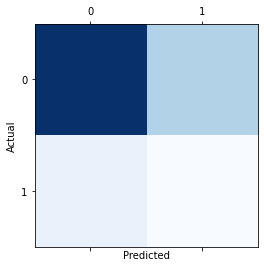

In [16]:
from sklearn.metrics import confusion_matrix

# confusion matrix with the actual values
print(confusion_matrix(y_train_5, y_train_pred))
plt.matshow(confusion_matrix(y_train_5, y_train_pred), cmap=plt.cm.Blues, interpolation='nearest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Each row in a confusion matrix represents an actual class while the columns represent the predicted columns